# Global Power Plant Database Project

**The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.**

**On the Basis of features we are going to generate two type of Predictions**


**Prediction:**


**primary_fuel**

**capacity_mw****

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [120]:
df = pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking all the columns of Dataset**

In [121]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

**Observation**

**URL is just a link for accessing information where encoding of same is also not possible and even not required**

**We are going to drop the feature**

In [122]:
df.drop(columns=['url'],inplace=True)

In [123]:
#Checking shape of dataset
df.shape

(907, 26)

In [124]:
#Checking Datatype of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  geolocatio

**Since their are lot of features present lets check the null values in our Dataset as we have seen their are null values present,lets see how much information is missing is Dataset**

In [125]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

**We have 907 rows in dataset and all these columns are having more 450 missing values i.e. more than 50% and filling the values in these will not make a sense we will drop these features**

other_fuel1

other_fuel2

other_fuel3

owner

wepp_id

generation_gwh_2013

generation_gwh_2014

generation_gwh_2015

generation_gwh_2016

generation_gwh_2018

generation_gwh_2019         

generation_gwh_2017

generation_data_source

estimated_generation_gwh


In [126]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_gwh_2018","generation_gwh_2019","generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)


     

In [127]:
#Checking shape of Dataset after dropping features
df.shape

(907, 12)

In [128]:
#Lets check the unique values present in our dataset
df.nunique()

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
geolocation_source         3
year_of_capacity_data      1
dtype: int64

**We can see in our Dataset name and gppd_idnr are holding 907 values as unique which can not be a good choice to keep for learning of machine and countwise vice-versa for country and country_long and year_of_capacity_data where both these features are holding only 1 values in all rows we are going to drop these features**

In [129]:
df.drop(['country','country_long','name','gppd_idnr','year_of_capacity_data'], axis=1, inplace=True)


In [130]:
df.shape

(907, 7)

**Filling of missing values categorical data with mode and continuous data with mean**

In [131]:
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

**Checking the count of null after filling the same**

In [132]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

**Their are no null values present in DataSet,we can proceed to check the encoding part**

In [133]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI
903,3.0,12.8932,78.1654,Solar,2015.0,Karnataka Power Corporation Limited,Industry About
904,25.5,15.2758,75.5811,Wind,2015.0,CDM,WRI
905,80.0,24.3500,73.7477,Coal,2015.0,Hindustan Zinc ltd,WRI


**Encoding required for our classification model label primary_fuel and considering features encoding required in source and geolocation_source**

**We will check the count of unique values in all and will decide the encoder to encode values**

In [134]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

**We can use Label encoder to encode the values of Primary_fuel**

In [135]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

**Their are lot of unique values present in Primary_fuel we will use ordinal encoder as get_dummies and OHE will make many columns which will not be a good choice to proceed**

In [136]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

**We will use Ordinal to encode the values in geolocation_source**

**We will encode these identified columns post some EDA for easy visualization of names**

In [137]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

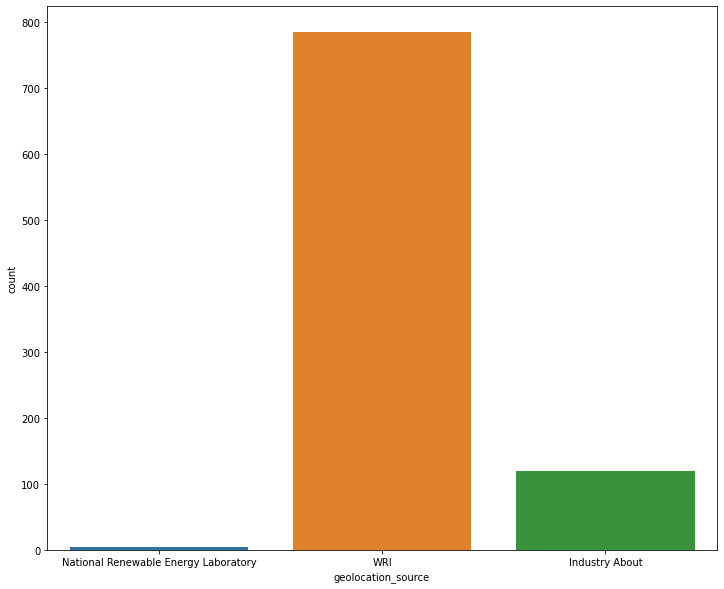

In [138]:
plt.figure(figsize=(12,10))
sns.countplot(x='geolocation_source',data=df)

                                        **Observations**

**WRI geolocation_source is covering the maximum count and we can visualize thar National Renewable Energy Laboratory is having the lowest count, Industry about is almost 10 times of National Renewable Energy Laboratory in count**

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

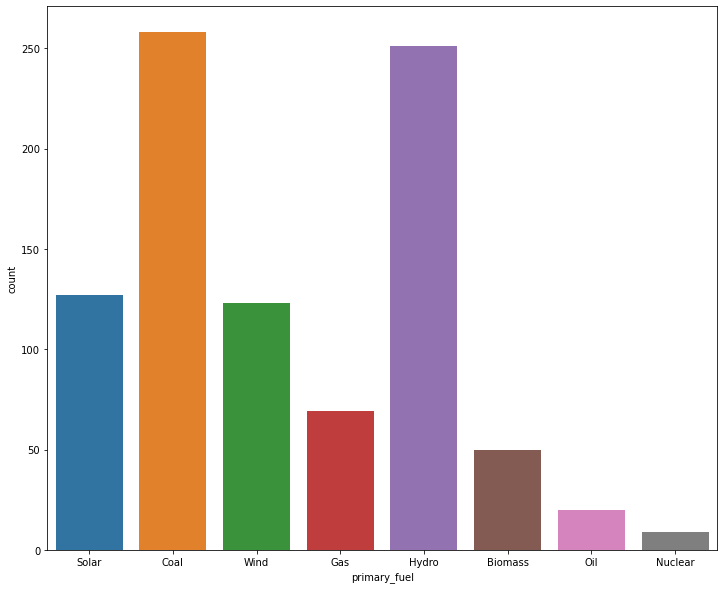

In [139]:
plt.figure(figsize=(12,10))
sns.countplot(x='primary_fuel',data=df)

                                            **Observations**
 
**Coal and Hydro are amongst the most used primary_fuel for generating electricity and we can also visualize that natural enegries like wind and Solar has also been visualized on a good note in terms of count of usage** 

<AxesSubplot:xlabel='count', ylabel='commissioning_year'>

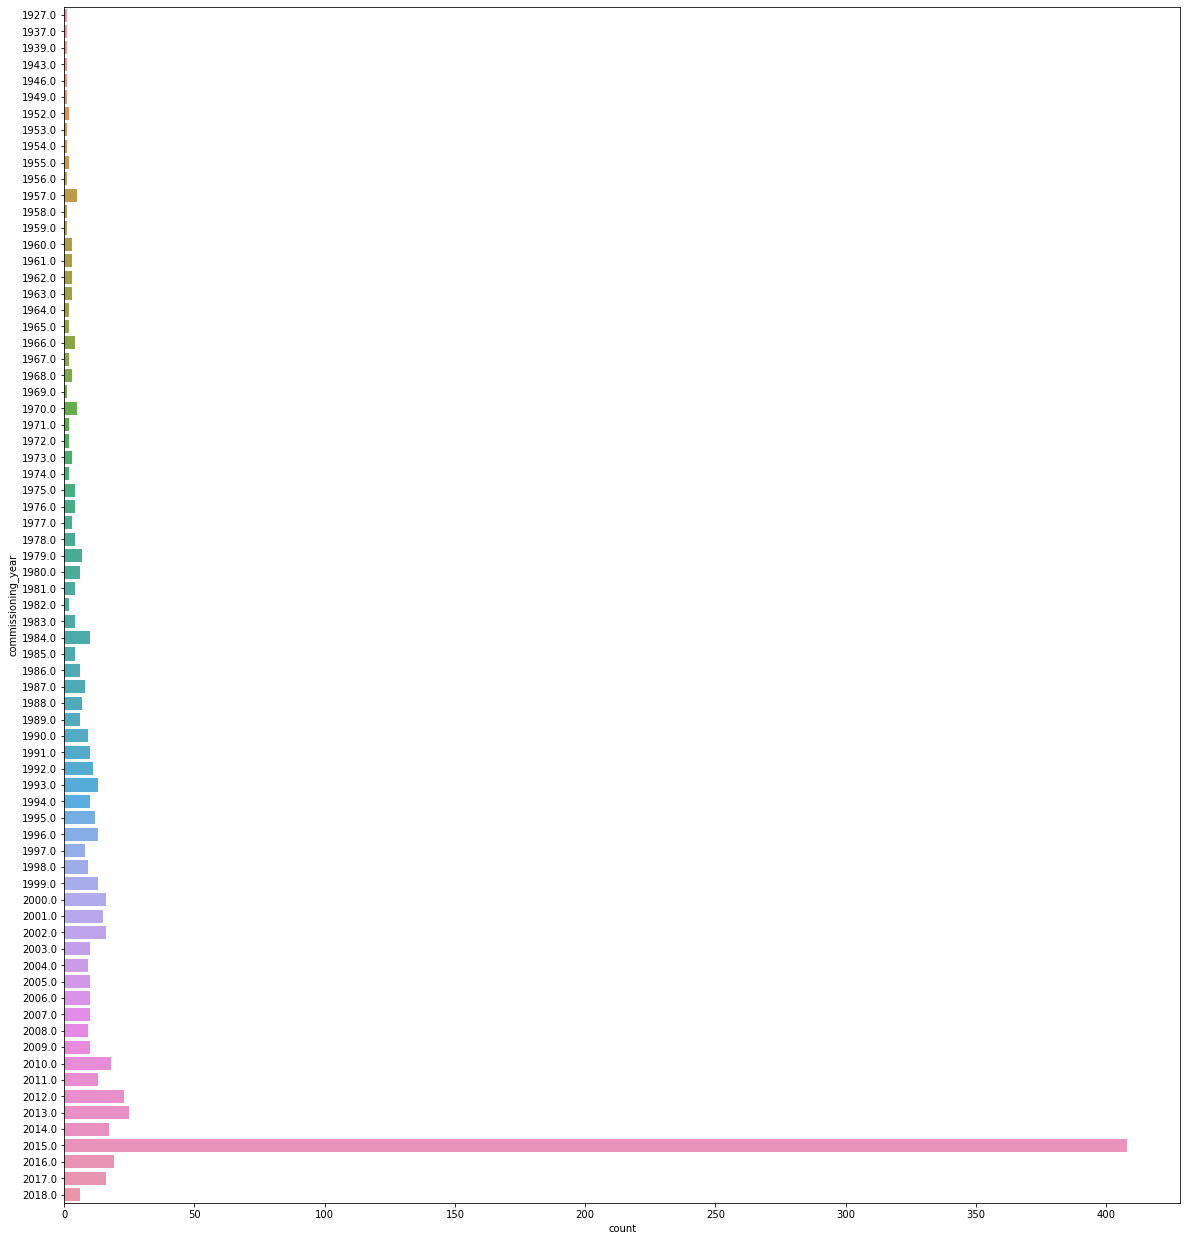

In [140]:
plt.figure(figsize=(20,22))
sns.countplot(y='commissioning_year',data=df)

                                               **Observations**

**Year 2015 is covering the maximum data as we have also filled the value with mode and can clearly visualize this row is holding the maximum data**

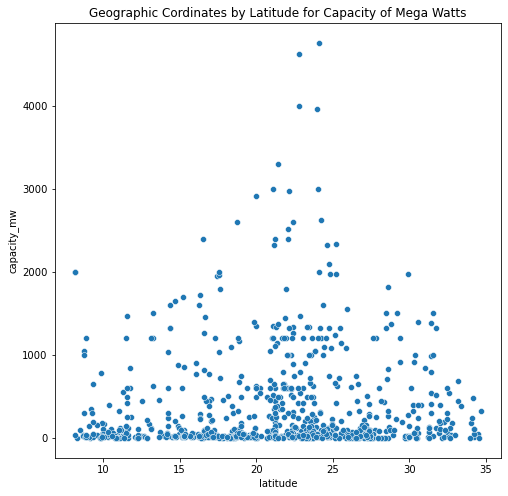

In [141]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='latitude',y='capacity_mw',data=df)
plt.title("Geographic Cordinates by Latitude for Capacity of Mega Watts")
plt.show()

                                 **Observations**

**We can visualize the best co-ordinate for latitude in relation with capacity_mw in between 20-25 where maximum of these data points has been scattered even with increase in capacity_mw of plant we can visualize the best choice is still lies between 20-25**                              

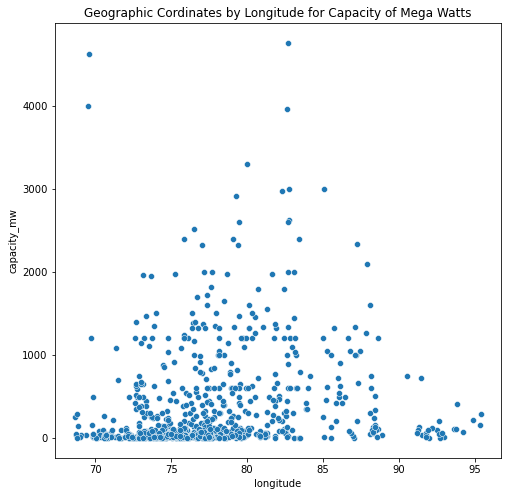

In [142]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='longitude',y='capacity_mw',data=df)
plt.title("Geographic Cordinates by Longitude for Capacity of Mega Watts")
plt.show()

                                        **Observations**
                                        
**Longitude co-ordinates are preferable in between 73-80 we can visualize maximum datapoints on this range these geographic co-ordinates are used to identify the geographical locations where we can see the best Longitude is between 73-80 for maximum powerplants**                                        

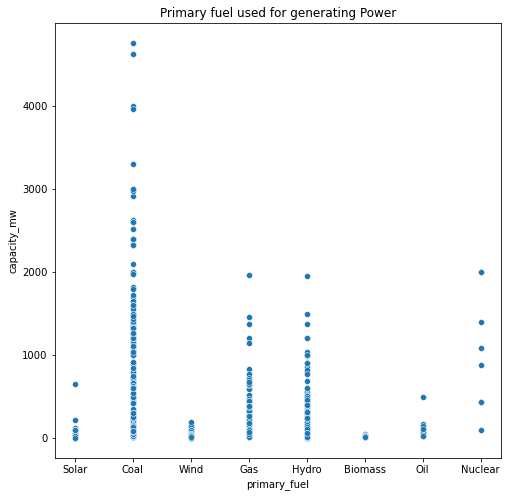

In [143]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=df)
plt.title("Primary fuel used for generating Power")
plt.show()

                                           **Observations**
                                           
**Coal is the primarily used resource for generating power here we can visualize that our natural energy source Solar and Wind are scarcely used ,Gas and Hydro-fuel are sharing the equivalent count in usage**                                           

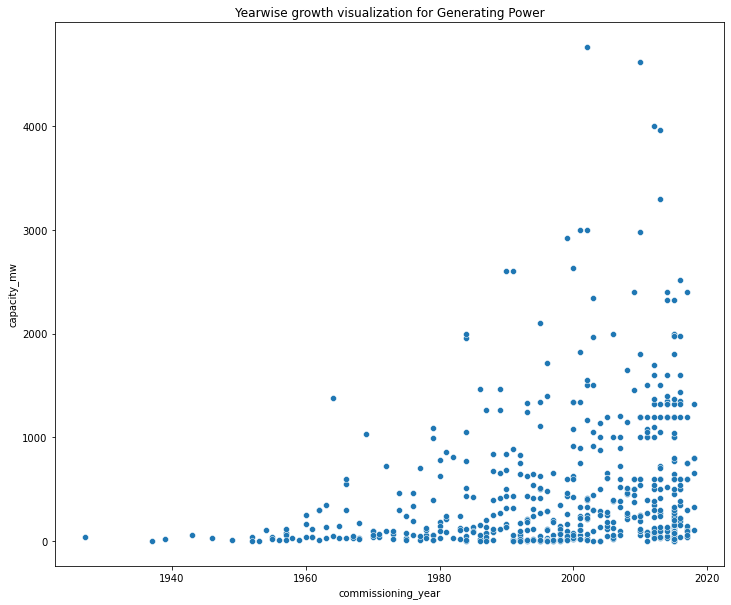

In [144]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='commissioning_year',y='capacity_mw',data=df)
plt.title("Yearwise growth visualization for Generating Power")
plt.show()

                                          **Observations**

**The power generating capacity of plants has been visualized in increasing order in starting years the capacity to generate power has been visualized as vey less as with passage of time capacity has been increased which is on a positive note**                                         
                                          

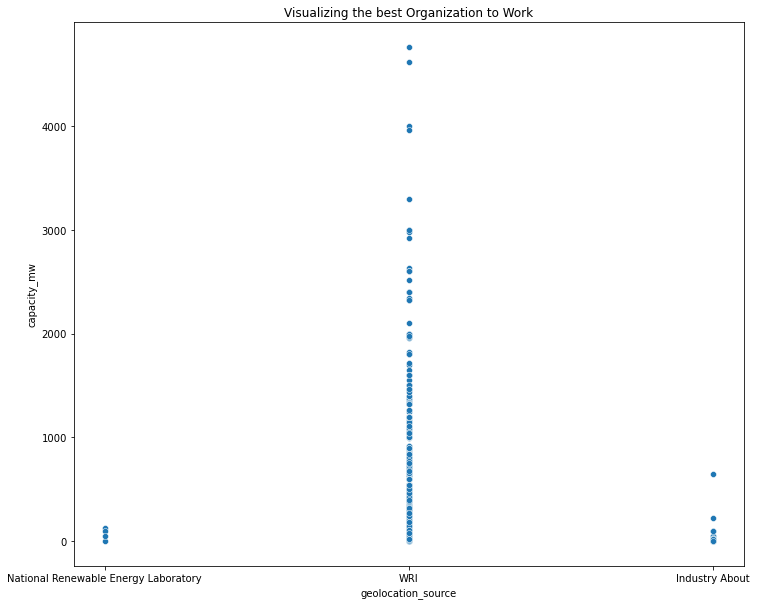

In [145]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='geolocation_source',y='capacity_mw',data=df)
plt.title("Visualizing the best Organization to Work")
plt.show()

                                           **Observations**
                                           
**WRI is the most preferable global research organization to develop practical solutions in relation with Power generation**                                           

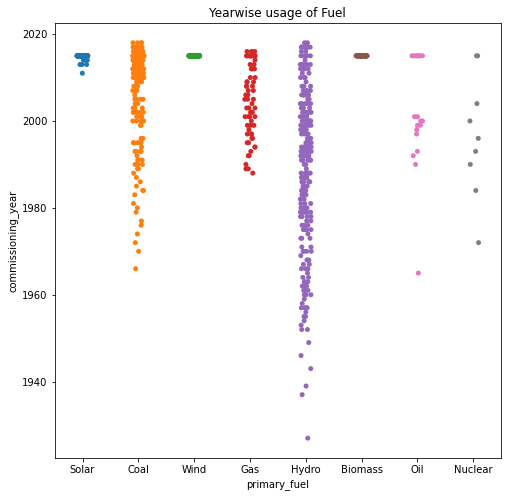

In [146]:
plt.figure(figsize=(8,8))
sns.stripplot(x='primary_fuel',y='commissioning_year',data=df)
plt.title("Yearwise usage of Fuel")
plt.show()

                                         **Observations**

**Yearwise distribution has been visualize where Coal and hydro are the most preferable Primary fuel and we can also visualize that their is a slight growth in Gas usage with passage of time**                                       

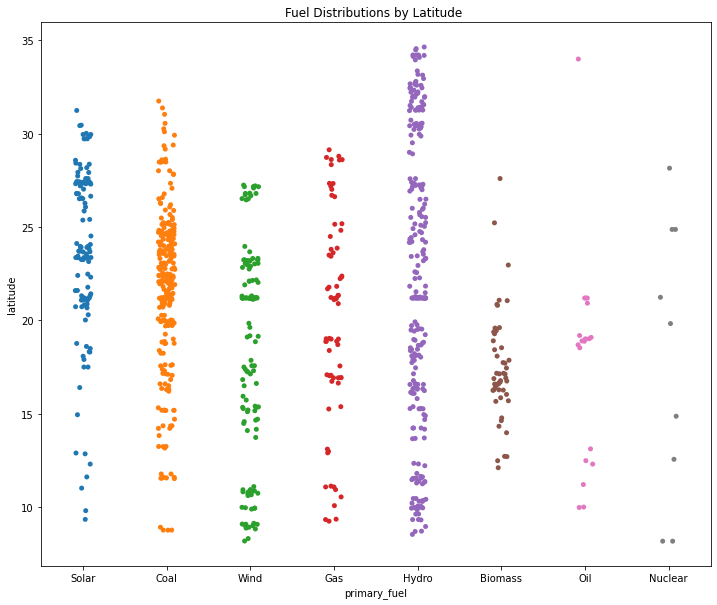

In [147]:
plt.figure(figsize=(12,10))
sns.stripplot(x='primary_fuel',y='latitude',data=df)
plt.title("Fuel Distributions by Latitude ")
plt.show()

                                       **Observations**
                                       
**Hydro fuel is primarily distributed fuel amongst the latitude where coal is also very close to Hydro in terms of distribution**

**Earlier we have visualized coal is the most used fuel where now we can also visualize that Hydro fuel is also distributed on higher scale for usage,this might be the alternative fuel to restore coal**

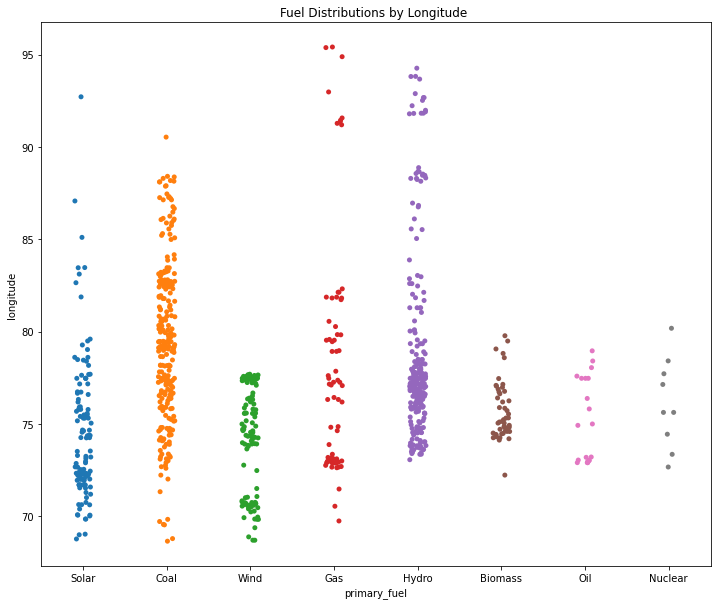

In [148]:
plt.figure(figsize=(12,10))
sns.stripplot(x='primary_fuel',y='longitude',data=df)
plt.title("Fuel Distributions by Longitude ")
plt.show()

                                     **Observations**
                                     
**Longitude wise Hydro is having a edge as compared with coal in above figure we have visualized the same trens Latitude wise here we can observe the same distribution quantity wise and fuel wise ,we can be sure that Hydro is the alternative fuel supplied in alternative to coal in different locations**                                   

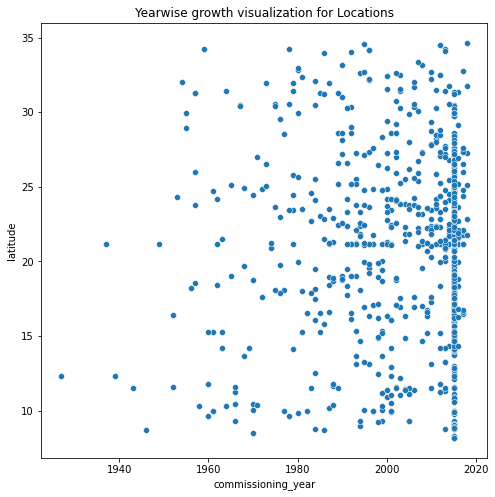

In [149]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='commissioning_year',y='latitude',data=df)
plt.title("Yearwise growth visualization for Locations")
plt.show()

                                      **Observations**
**Growth at a very higher rate has been visualized with passage of time where we have multiple plants base in 2018 we can say this year has bought up a apex increase in Plants setup across**                                     

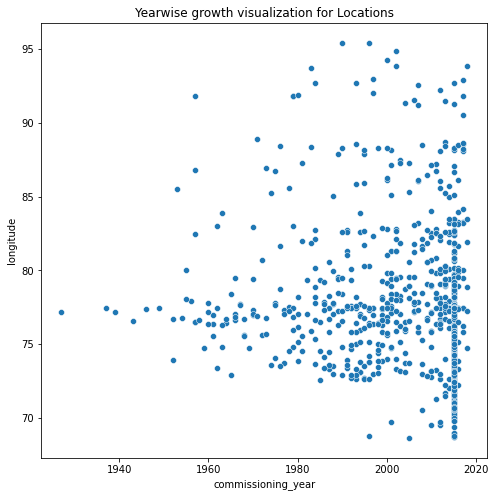

In [150]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='commissioning_year',y='longitude',data=df)
plt.title("Yearwise growth visualization for Locations")
plt.show()

                                           **Observations**
                                           
**Location wise same trend has been observed as in above graph year 2018 was identified as the year of more setups latitude wise where longitude wise we are visualizing the same pattern and now we can be sure that huge amount of stups are initiated in this year**                                           

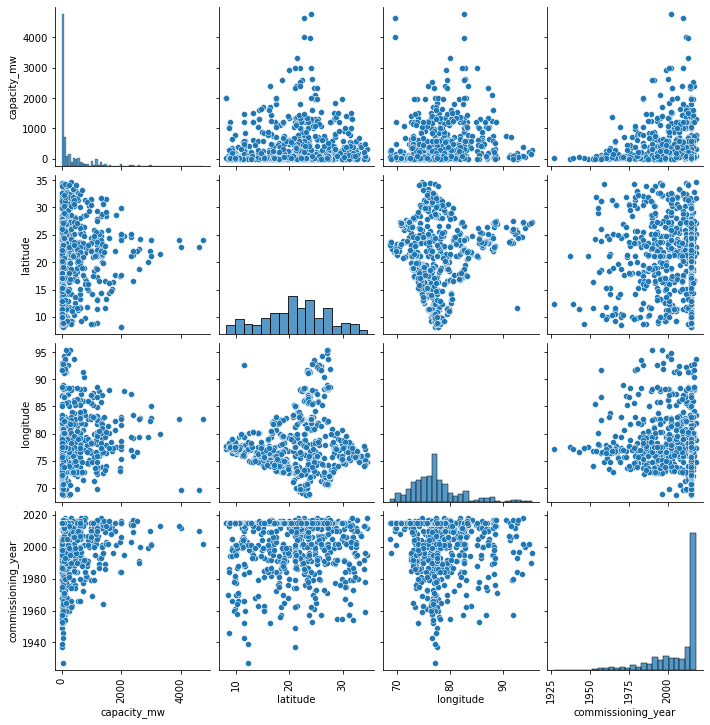

In [151]:
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

**Visualizing data distribution for Numerical data**

**Encoding**

In [152]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [153]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


**Plotting Histogram after encosing**

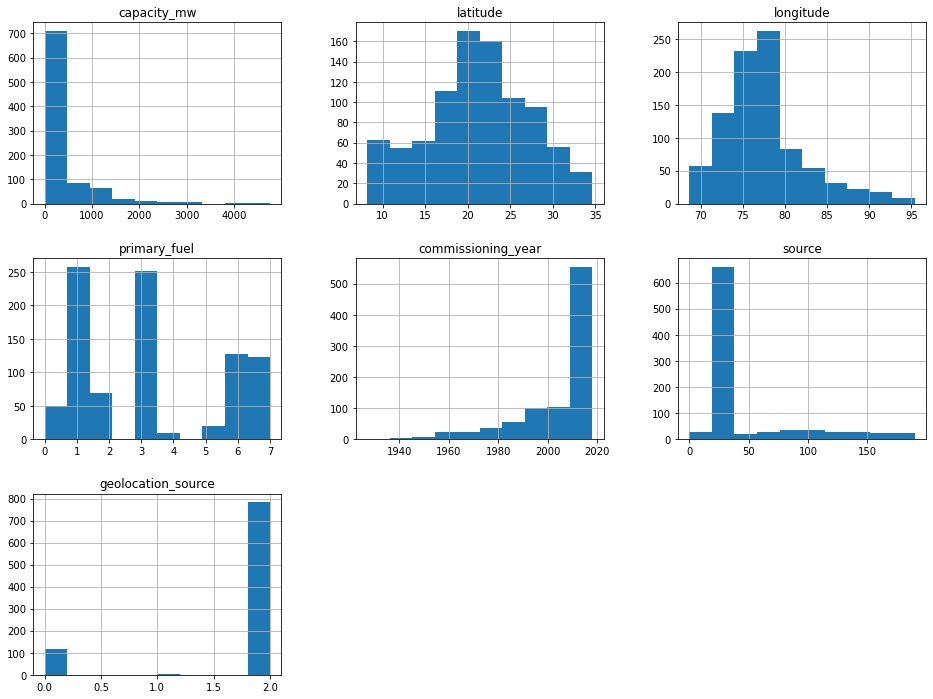

In [154]:
df.hist(figsize=(16,12))
plt.show()

**Skewness in capacity, commissioning_year , source , longitude has been visualized**

**Multi_Collinearity check using Heatmap**

<AxesSubplot:>

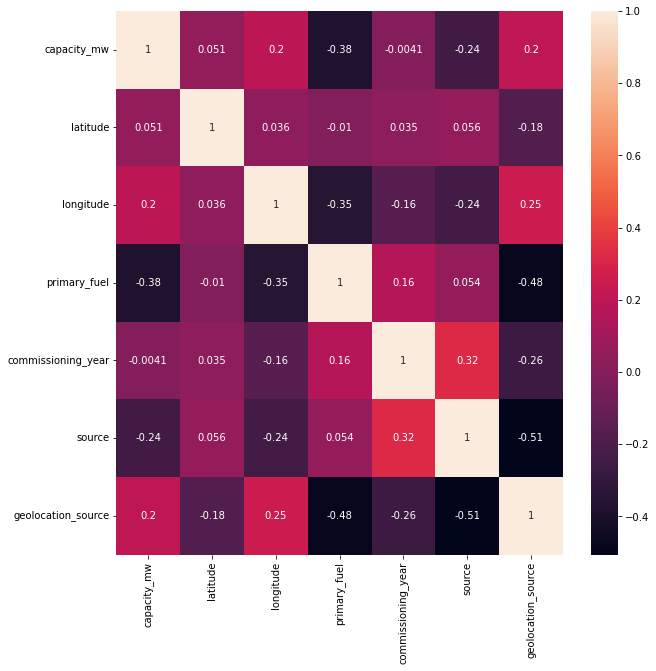

In [155]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

**No sign of Multi-collinearity has been visualized**

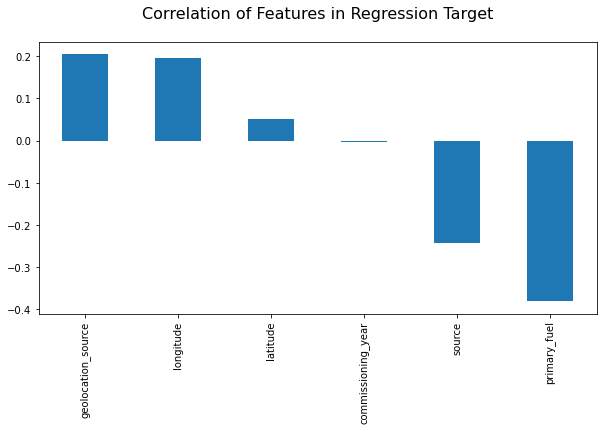

In [156]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features in Regression Target\n", fontsize=16)

plt.show()


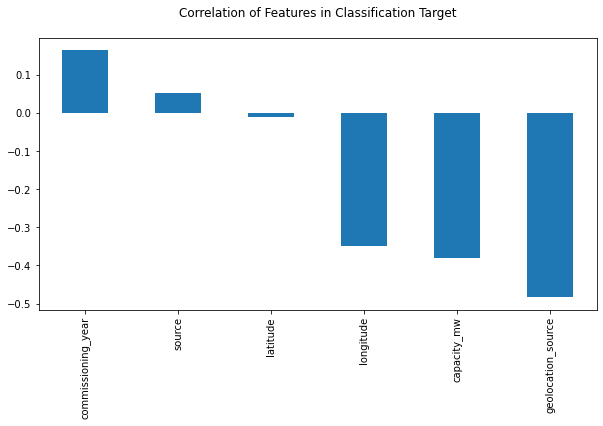

In [157]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features in Classification Target\n", fontsize=12)

plt.show()

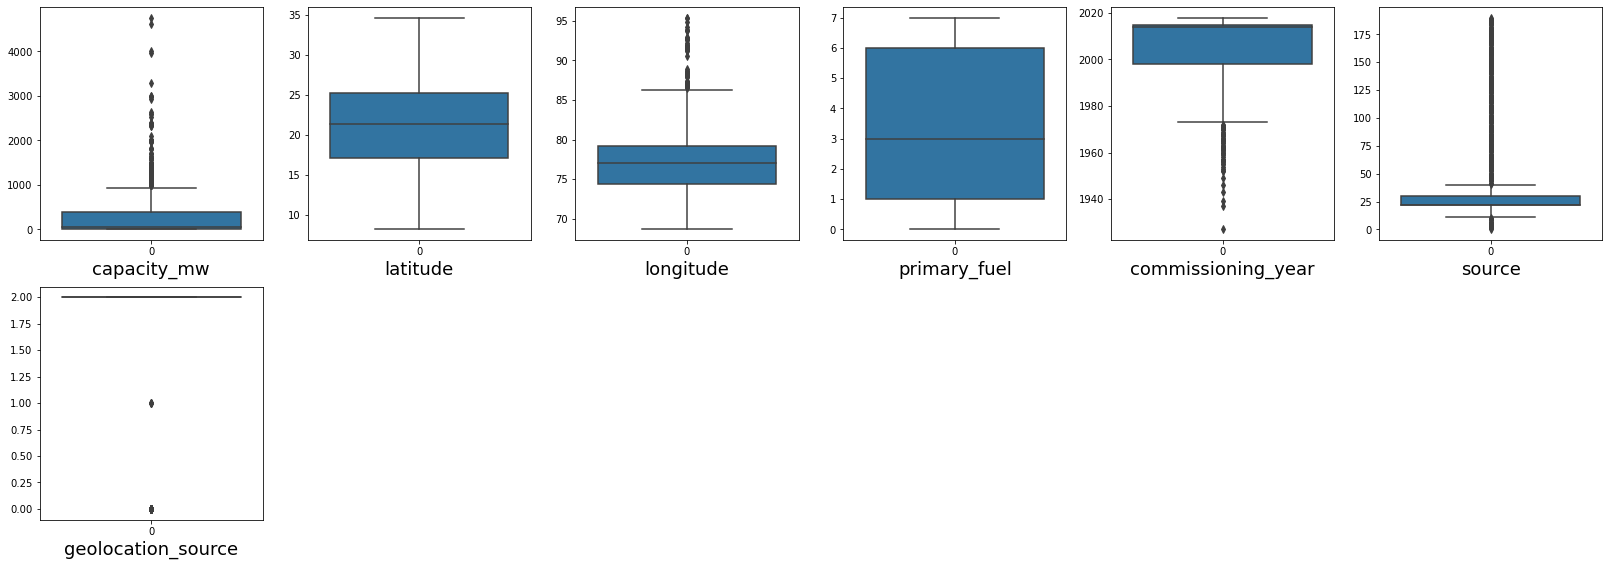

In [158]:
plt.figure(figsize=(28,30))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=18)
        
    plotnumber+=1
    
plt.show()   

                                      **Observations**
                                      
**Their are outliers present in our Dataset we need to controll the same using ZScore**                                       

In [159]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (907, 7)
Shape of the dataframe after removing outliers:  (838, 7)
Percentage of data loss post outlier removal:  7.6074972436604185


**Percentage Loss is acceptable**

**Skewness**

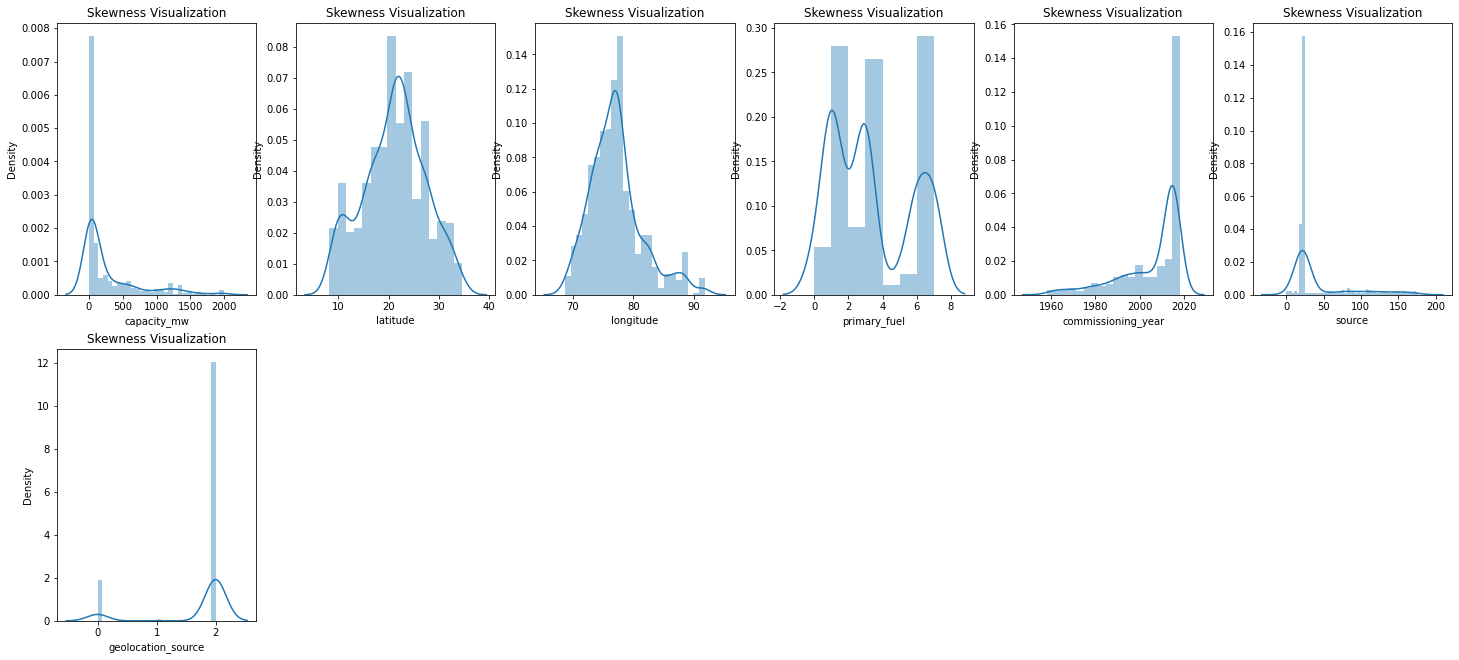

In [160]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.distplot(df[column])
        plt.title('Skewness Visualization')
    plotnumber+=1
    
plt.show() 

**Same features has been encountered during Histogram Visualization though data set is small we will be using Log Transformation to controll skewness**

In [161]:
# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)



Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'source', 'geolocation_source']


In [162]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)

Object Data Type Columns are:  []


**Controlling skewness of Float data type columns**

In [163]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])


**Checking Class Imbalance in our target variable for Classification Model for that we are seprating features and Label**

In [164]:
x = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

In [165]:
y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [166]:
#Importing Library
from imblearn.over_sampling import SMOTE

In [167]:
over = SMOTE()
x, y = over.fit_resample(x, y)

y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

**Class Imbalance has been treated by Using Synthetic Minority Oversampling Technique**

In [168]:
##Scaling data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.715024,1.453664,-0.856654,0.398384,1.475353,-1.173768
1,0.167707,0.861984,-0.452673,0.723424,2.087600,0.372466
2,-0.339964,0.366407,-2.040096,0.723424,-0.646900,0.372466
3,0.346573,0.707018,3.974080,-0.170436,-0.588285,0.372466
4,1.801812,0.376189,1.719154,0.723424,-0.588285,0.372466


**Importing necessary Libraries for Model Building**

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


**Finding maximum accuracy**

In [170]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 90.17094017094017 on Random State 504


**Train_Test_Split**

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=504)


**Defining a function to print Accuracy_score,CV_Score,printing Classification_report and finally the result by deducting Accuracy score from CV score to choose the least difference model**

In [172]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=431)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

**Decision Tree Classifier**

In [173]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 83.33333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        57
           1       0.61      0.63      0.62        62
           2       0.70      0.63      0.67        60
           3       0.74      0.77      0.75        52
           4       0.81      0.83      0.82        58
           5       0.92      0.92      0.92        71
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        56

    accuracy                           0.83       468
   macro avg       0.83      0.84      0.84       468
weighted avg       0.83      0.83      0.83       468

Cross Validation Score: 86.48627450980392

Accuracy Score - Cross Validation Score is -3.152941176470577


**Random Forest Classifier**

In [174]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 90.5982905982906

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       0.81      0.77      0.79        62
           2       0.88      0.83      0.85        60
           3       0.78      0.77      0.78        52
           4       0.90      0.95      0.92        58
           5       0.90      0.93      0.92        71
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        56

    accuracy                           0.91       468
   macro avg       0.91      0.91      0.91       468
weighted avg       0.90      0.91      0.91       468

Cross Validation Score: 90.33026737967914

Accuracy Score - Cross Validation Score is 0.26802321861146083


**KNeighbors Classifier**

In [175]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 80.34188034188034

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        57
           1       0.66      0.44      0.52        62
           2       0.79      0.62      0.69        60
           3       0.77      0.52      0.62        52
           4       0.75      1.00      0.86        58
           5       0.77      0.93      0.84        71
           6       1.00      0.98      0.99        52
           7       0.80      0.98      0.88        56

    accuracy                           0.80       468
   macro avg       0.80      0.80      0.79       468
weighted avg       0.80      0.80      0.79       468

Cross Validation Score: 80.66210338680926

Accuracy Score - Cross Validation Score is -0.3202230449289232


**XGB Classifier**

In [176]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score: 90.38461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.78      0.81      0.79        62
           2       0.88      0.77      0.82        60
           3       0.78      0.81      0.79        52
           4       0.92      0.93      0.92        58
           5       0.92      0.94      0.93        71
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        56

    accuracy                           0.90       468
   macro avg       0.91      0.90      0.90       468
weighted avg       0.90      0.90      0.90       468

Cross Validation Score: 89.95650623885918

Accuracy Score - Cross Validation Score is 0.42810914575620984


**HyperParameter tuning on RandomForestClassifier**

In [ ]:
RandomForestClassifier()

In [177]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5],
              'min_samples_split':[3,5,7,9],
              'min_samples_leaf' : [2,3,4,5]}

In [180]:
GSCV = GridSearchCV(RandomForestClassifier(), fmod_param, cv=5)

In [181]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 5, 7, 9]})

In [182]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [184]:
Final_Model = RandomForestClassifier(criterion="entropy", max_depth=5, min_samples_leaf=5,min_samples_split=5)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 84.4017094017094


**Confusion Matrix**

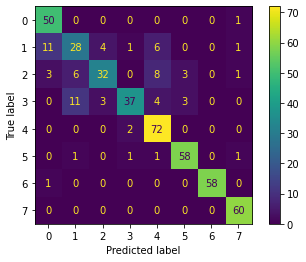

In [186]:
metrics_n = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test)

plt.show()

**Saving Final model**

In [187]:
import joblib

In [188]:
filename = "Final_DT.pkl"
joblib.dump(Final_Model, filename)

['Final_DT.pkl']

**Classification Model Completed**

# Regression Model

In [189]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

**Features Scaling**

In [190]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.155327,-0.905807,1.174653,0.384586,1.701177,-1.059632
1,0.598448,-0.567933,-0.986874,0.671188,2.338665,0.400848
2,0.132019,-1.895590,1.606958,0.671188,-0.508567,0.400848
3,0.452596,3.134428,-0.554568,-0.116966,-0.447535,0.400848
4,0.141226,1.248497,-0.986874,0.671188,-0.447535,0.400848


In [191]:
#Importing Libraries for Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [192]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)


Best R2 score is 0.5263113041667535 on Random State 672


**Defining function for Regression**

In [193]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=672)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

**Linear Regression**

In [194]:

model=LinearRegression()
reg(model, X, Y)



RMSE Score is: 1.2801035529871414
R2 Score is: 52.631130416675354
Cross Validation Score: 40.994622749487434
R2 Score - Cross Validation Score is 11.63650766718792


**Ridge Regression**

In [195]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)


RMSE Score is: 1.2816594754765303
R2 Score is: 52.515909924353195
Cross Validation Score: 41.020843797857495
R2 Score - Cross Validation Score is 11.4950661264957


**Lasso Regression**

model=Lasso(alpha=1e-2, normalize=True)
reg(model, X, Y)


**Random Forest Regressor**

In [199]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.3292537123868333
R2 Score is: 48.9238000291895
Cross Validation Score: 45.59789928247532
R2 Score - Cross Validation Score is 3.325900746714183


**Support Vector Regressor**

In [200]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.1989404427765349
R2 Score is: 58.44741610262582
Cross Validation Score: 48.26269640478936
R2 Score - Cross Validation Score is 10.184719697836464


**KNeighbors Regressor**

In [201]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)


RMSE Score is: 1.1989404427765349
R2 Score is: 58.44741610262582
Cross Validation Score: 48.26269640478936
R2 Score - Cross Validation Score is 10.184719697836464


**Gradient Boosting Regressor**

In [202]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.4888469696403528
R2 Score is: 35.922886836141394
Cross Validation Score: 4.537297748343662
R2 Score - Cross Validation Score is 31.385589087797733


**HyperParameter Tuning on Random Forest Regressor**

In [209]:
fmod_param = {'criterion' : ['squared_error', 'absolute_error'],
              'max_depth' : [2, 3, 4, 5],
              'min_samples_split':[3,5,7,9],
              'n_estimators' : [2,3,4,5],
             'min_samples_leaf':[2,5,7,9]}

In [210]:
GSCV = GridSearchCV(RandomForestRegressor(), fmod_param, cv=5)

In [211]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 5, 7, 9],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [2, 3, 4, 5]})

In [212]:
GSCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 5}

In [213]:
Final_Model = RandomForestRegressor(criterion='squared_error', min_samples_split=7, n_estimators=5,max_depth=5 ,min_samples_leaf=2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)


R2 score for the Best Model is: 60.83685343833653


**Saving Final Model**

In [214]:
filename = "FinalModel_Regression_E5.pkl"
joblib.dump(Final_Model, filename)


['FinalModel_Regression_E5.pkl']

**Model Completed**